In [3]:
# Python Notebook for PHYS 422 Assignment #4

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import rc
import scipy as sp

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'

from matplotlib.colors import PowerNorm


A point charge follows the path:

$$
\vec{w}(t) = \omega Rt \hat{x} +Rsin(\omega t) \hat{y}
$$

Produce 4 plots of the electric and magnetic field (experienced at stationary points) in the z = 0 plane between t = 0 to $2\pi /\omega$.

Parameterize $R=\rho c /\omega$ for some unitless $\rho$, and explore relativistic particle speeds where you are otherwise free to choose R and ω. 

Make additional plots of the Poynting vector, S, at one particular time instant for as many $\rho$ values as you feel are useful to indicate the effect occurring here. 

Include an overlay of the particle's trajectory on your plot, as well as showing its current location. 

Note: You may need to use root solving to find the retarded location/time of
the charge for every single xy point on your plot. 





We have a form of the path parametrized by time, t. We may take the derivatives of this analytically to simplify the analysis, as we need $\vec{v}(t)$, $\vec{a}(t)$.

$$
\vec{v}(t) =  \omega R \hat{x} + \omega Rcos(\omega t) \hat{y}
$$

$$
\vec{a}(t) = 0 \hat{x} - R\omega^2 sin(\omega t) \hat{y}
$$

We want to use a form of $R=\frac{\rho c}{\omega}$ such that:

$$
\vec{v}(t) =  \rho c \hat{x} + \rho c cos(\omega t) \hat{y}
$$

$$
\vec{a}(t) = 0 \hat{x} - {\rho \ c} \ \omega \ sin(\omega t) \hat{y}
$$

We can then see that for given values of $\rho$, we are some fraction of the speed of light in $\hat{x}$ and some fraction of the speed of light and function of $\omega$ in $\hat{y}$. We may then choose our values of $\rho$ to be interesting cases of this. Let's choose three $\rho$'s such that one is non-relativistic, somewhat relativistic, and highly relativistic. 

For completeness, the position in terms of $\rho$ is given by:

$$
\vec{w}(t) = \rho \ c \ t \hat{x} +\frac{\rho \ c}{\omega}sin(\omega t) \hat{y}
$$



Note: we have that the parameter of the size of the motion $R$ is proportional to some dimensionless parameter, a frequency, and the speed of light. We expect $R$ to be relatively small for a point charge I would say, and we are looking to vary $\rho$ between zero and ~1 as we cannot exceed the speed of light. It may then be in our favour to choose a very high frequency on the order of light speed so that our R path value is small. 

Note 2: Since we have a form for the velocity, and this should not exceed light speed during its path, we can set a relativistic limit on what we can set $\rho$ to be as the $\textit{speed}$ < c and:

$$
v = \sqrt{\rho^2 c^2 + \rho^2 c^2 (at \ cos\omega t  \ max)} = \sqrt{2} \rho c
$$

And:

$$
\sqrt{2} \rho \lt \frac{v}{c} \lt 1 \longrightarrow \rho \lt \frac{1}{\sqrt{2}} \approx 0.707
$$

So we will choose $\rho = 0.01, 0.3, 0.7$ as our three values to test the efects or relativity.

And $\omega = 10^{8}$ to balance out c.

In [39]:
# We may get our bearings by first plotting the path of the particle. First we must define our constants:

# we choose an appropriate value for omega. Honestly no idea what
# a frequency would look like here so going to tentatively set it to 10^8:

w=1e9;
c = 3e8;       # speed of light:
e0 = 8.854e-12 # permittivity
mu0 = 1.257e-6 # permeability
q = 1.602e-19  # charge of particle

# choice of rhos! will start with three quite different values and see where that gets us:

rhos = np.array([0.01, 0.3, 0.7])

# and R can be defined in terms of rho:

Rs = rhos*c/w

def position(t, R):
    '''
    takes time t and Radius R
    and returns the path of the 
    particle for those values
    '''
    
    w_x = w*R*t
    w_y = R*np.sin(w*t)
    
    return np.array([w_x, w_y])

def velocity(t, R):
    '''
    takes time t and Radius R
    and returns the velocity of the 
    particle for those values
    '''
    
    w_x = w*R
    w_y = w*R*np.cos(w*t)
    
    return np.array([w_x, w_y])

def acceleration(t, R):
    '''
    takes time t and Radius R
    and returns the acceleration of the 
    particle for those values
    '''
    
    w_x = 0
    w_y = -w*w*R*np.sin(w*t)
    
    return np.array([w_x, w_y])

In [43]:
# wish to plot our trajectory in the x-y plane:

t_vals = np.linspace(0, 2*np.pi/w, 1000)
traj_r1 = position(t_vals, Rs[0])
traj_r2 = position(t_vals, Rs[1])
traj_r3 = position(t_vals, Rs[2])

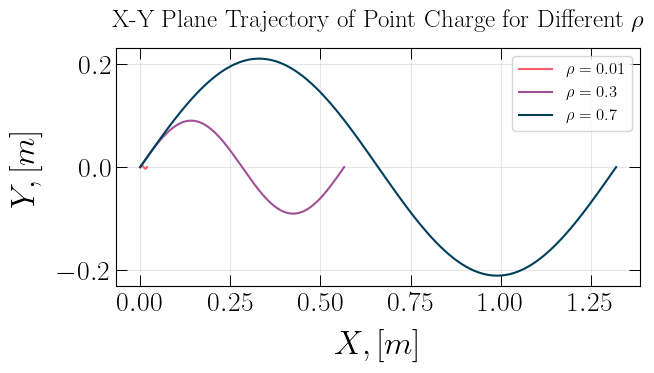

In [57]:
# initiates plotting parameters
width=8;height=5;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"X-Y Plane Trajectory of Point Charge for Different $\rho$", pad = 15, fontsize=18)
ax1.set_xlabel(r"$X, [m]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"$Y, [m]$",labelpad =10,fontsize=24)

# actual plots:
ax1.plot(traj_r1[0], traj_r1[1],c='#f95d6a' , label=r'$\rho = 0.01$')
ax1.plot(traj_r2[0], traj_r2[1], c='#a05195', label=r'$\rho = 0.3$')
ax1.plot(traj_r3[0], traj_r3[1], c='#003f5c', label=r'$\rho = 0.7$')


# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
#ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)

ax1.legend(fontsize=12)
plt.show()

The fields from a moving point charge can be found from the result given in Griffith's such that:

$$
\vec{E}(\vec{r}, t) = \frac{q}{4\pi \epsilon_0} \frac{\mathscr{r} }{(\vec{\mathscr{r} } \cdot \vec{v})^3} [(c^2-v^2)\vec{u} +\vec{\mathscr{r} } \times (\vec{u} \times \vec{a})]
$$

And the magnetic field as:

$$
\vec{B}(\vec{r},t) = \frac{1}{c} \hat{\mathscr{r} } \times \vec{E}(\vec{r}, t)
$$

All quantities in both of the above expressions are evaluated at a retarded time. We may get this time by using the form given in the notes, where $t_r $ is the delayed time for the communication of the movement of the charge such that:

$$
t_r -t + \frac{1}{c}|\vec{r} - \vec{w}(t_r)| = 0
$$

The crux of this problem is finding this time so we may evaluate the functions at it, thus giving our field. To best do this, we rely on root-finding. So we need a form for $\vec{\mathscr{r}}$ which is conveniently:

$$
\vec{\mathscr{r}} = \vec{r} - \vec{w}(t_r)
$$

Similarly, we may find a form for $\vec{u}$ as:

$$
\vec{u} = c \hat{\mathscr{r}} - \vec{v}
$$

We now have almost everything we need, the algorithm we will then take here is:

1. Plug in our actual forms of the position, acceleration and velocity into the above equations.
2. Generate functions that will calcualte the E and B fields for the system given a retarded time, which will come from a time in the evolution of the particle using a root solving method on the above equation. 
3. Evaluate the functions for a given time over all space nearby and repeat for four samplings of the path. 



Plugging in $\vec{w}$ into the retarded time formula gives us:

$$
t_r - t +\frac{1}{c} |\vec{r} - \rho \ c \ t_r \hat{x} +\frac{\rho \ c}{\omega}sin(\omega t_r) \hat{y}| = 0
$$

$$
t_r - t +\frac{1}{c} \sqrt{(x - \rho c t_r)^2 +(y-\frac{\rho c}{\omega}sin(\omega t_r))^2} = 0
$$

In [93]:
# we begin by defining the function that we can root solve for:

# from now on p=rho

def ret_time(t_r, T, X, Y, p):
    '''
    takes an input retarded time
    present time, t, and a coordinate 
    as well as the given rho value 
    and returns the function
    that must be root solved
    '''
    
    r_mag = np.sqrt((X-p*c*t_r)**2 + (Y-p*c/w* np.sin(w*t_r))**2)
    
    root_func = t_r - T + r_mag/c
    
    return root_func

# now we can define our E and B field:

def electro_field(t_r, r, p):
    '''
    Takes a position vector r
    and a retarded time t_r 
    as well as the given value for rho
    and returns the E field
    '''
    # prefactor:
    prefactor = q/(4*np.pi * e0)
    # need the seperation vector:
    sep_vec = r - position(t_r, p*c/w)
    sep_mag = np.sqrt(sep_vec[0]**2 + sep_vec[1]**2)
    # and the unit vector:
    sep_unit = sep_vec/sep_mag
    
    # need the acceleration and u vectors:
    accel = acceleration(t_r, p*c/w)
    u_vec = c*sep_mag - velocity(t_r, p*c*w)
    vel_mag = np.sqrt(velocity(t_r, p*c*w)[0]**2-velocity(t_r, p*c*w)[1]**2)
    
    # now have to deal with the double cross product. 
    # all of our vectors here are 2 x 2, can get around this by 
    # by adding a third z-axis value in the plane of z=0
    sep_vec2 = np.append(sep_vec,0)
    accel2   = np.append(accel,0)
    u_vec2   = np.append(u_vec,0)
    
    # can now do the cross product as outlined earlier:
    double_cross = np.cross(sep_vec2, np.cross(u_vec2, accel2))
    
    # and only take the x, y components:
    xy_cross = double_cross[:-1]
    
    # denominator:
    denom = (np.dot(sep_vec, u_vec))**3
    
    # finally the field:
    E_field = prefactor* (sep_mag/denom ) * ((c**2 - vel_mag**2)*u_vec + xy_cross)
    
    return E_field
    

# now we need a form for the B field: From the cross product
# B-field will have components in the z-plane, will have to find a way to visualize this

def magnetic_field(t_r, r, p):
    
    # need the seperation vector:
    sep_vec = r - position(t_r, p*c/w)
    sep_mag = np.sqrt(sep_vec[0]**2 + sep_vec[1]**2)
    # and the unit vector:
    sep_unit = sep_vec/sep_mag
    
    # once again will do the same trick of adding a zero z value:
    sep_unit2 = np.append(sep_unit, 0)
    E_field2 = np.append(electro_field(t_r, r, p),0)
    
    B_field = (1/c)*np.cross(sep_unit2, E_field2)
    
    return B_field


# now we have a form for the E, and B field and a way to find the retarded time
# we can now hopefully put it to the test.

In [382]:
def field_plotter(T, p, gridsize=15, arrowc='k'):
    '''
    Takes a given time, T in the 
    evolution of the particle, a particular 
    value of rho and a gridsize and 
    plots the E and B field with the
    particle trajectory overlaid
    '''
    
    # first need to generate a grid that captures all
    # of the important parts of the plot:
    boundsx = np.array([min(position(t_vals, p*c/w)[0]),max(position(t_vals, p*c/w)[0])])
    boundsy = np.array([min(position(t_vals, p*c/w)[1]),max(position(t_vals, p*c/w)[1])])
    
    # now need to generate the matrix of XY values that will correspond
    # to the grid that we evaluate the retarded time and field at:
    X_vals = np.linspace(boundsx[0], boundsx[1], gridsize)
    Y_vals = np.linspace(boundsy[0], boundsy[1], gridsize)
    
    # grid:
    XX, YY = np.meshgrid(X_vals,Y_vals)
    
    # initializes field arrays:
    
    b_field_z = np.zeros((gridsize,gridsize)); 
    e_field_x = np.zeros((gridsize, gridsize));
    e_field_y = np.zeros((gridsize, gridsize));

    #b_field = [[[0,0,0] for i in range(gridsize)] for i in range(gridsize)]
    #e_field = [[[0,0,0] for i in range(gridsize)] for i in range(gridsize)]


    # there is absolutely a way to do this vectorized with some kind of matlaby thing
    # but before I remember how to do that, I shall just loop through the grid:
    
    for i in range(gridsize):
        for j in range(gridsize):
            
            # first step inside of grid space is to find the retarded time for 
            # the given point: will do this with an optimization library
            t_r = sp.optimize.root(ret_time, 0, args=(T, XX[j][i], YY[j][i],p)).x[0]
            
            # now we need the position vector of the given grid cell:
            
            pos = np.array(XX[j][i], YY[j][i])
            
            # can calculate the fields now:
            Ex, Ey = electro_field(t_r, pos, p)
            
            Exn = Ex/(np.sqrt(Ex**2+Ey**2))
            Eyn = Ey/(np.sqrt(Ex**2+Ey**2))
            
            Bz = magnetic_field(t_r, pos, p)[2]
            
            b_field_z[j][i] = Bz
            e_field_x[j][i] = Exn
            e_field_y[j][i] = Eyn

    # trajectory of the particle given parameters:
    
    trajectory = position(t_vals, p*c/w)
                    
            
    # initiates plotting parameters
    width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

    # labels
    ax1.set_title(r"X-Y Plane Trajectory of Point Charge With Fields", pad = 15, fontsize=18)
    ax1.set_xlabel(r"$X, [m]$",labelpad =10, fontsize=24)
    ax1.set_ylabel(r"$Y, [m]$",labelpad =10,fontsize=24)

    # actual plots:
    quiver = ax1.quiver(XX, YY, e_field_x, e_field_y,color=arrowc ,headlength=4, label='E-Field')

    # plots trajectory:
    ax1.plot(trajectory[0], trajectory[1],c='pink', linestyle='--', label='Particle Traj.')
    
    # plots current position:
    ax1.scatter(position(T, p*c/w)[0],position(T, p*c/w)[1], color='white', marker='*',s=100,zorder=100, label='Current Pos.')

    # plots the Bz component as a heatmap:
    
    ax1.contourf(XX,YY, b_field_z, cmap='magma',zorder=0)
    
    # ticks and legend:
    #ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
    #ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
    ax1.tick_params(axis='both', direction="in")
    ax1.tick_params(which="minor", axis="x", direction="in")
    ax1.tick_params(which="minor", axis="y", direction="in")
    ax1.xaxis.set_ticks_position('both') 
    ax1.yaxis.set_ticks_position('both')
    ax1.grid(True, alpha=0.1, zorder=10)

    ax1.legend(fontsize=12)
    plt.show()
        

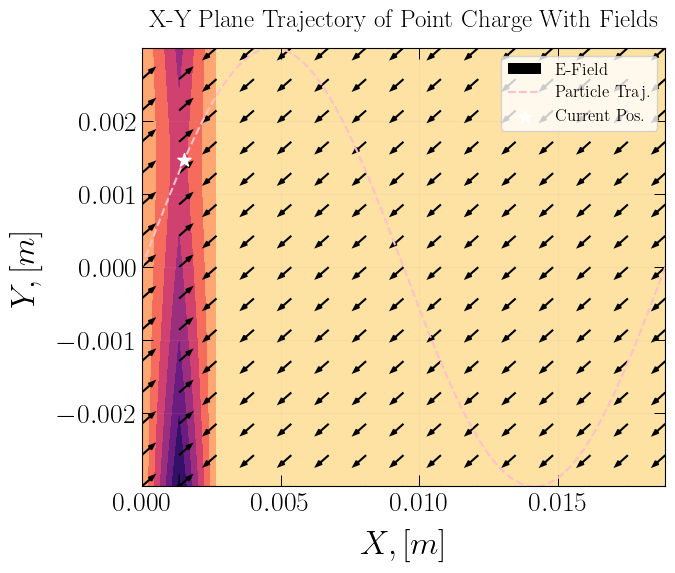

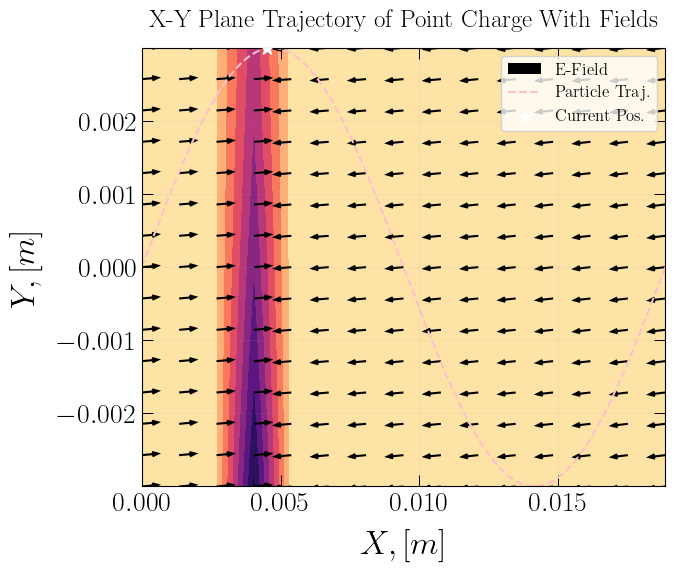

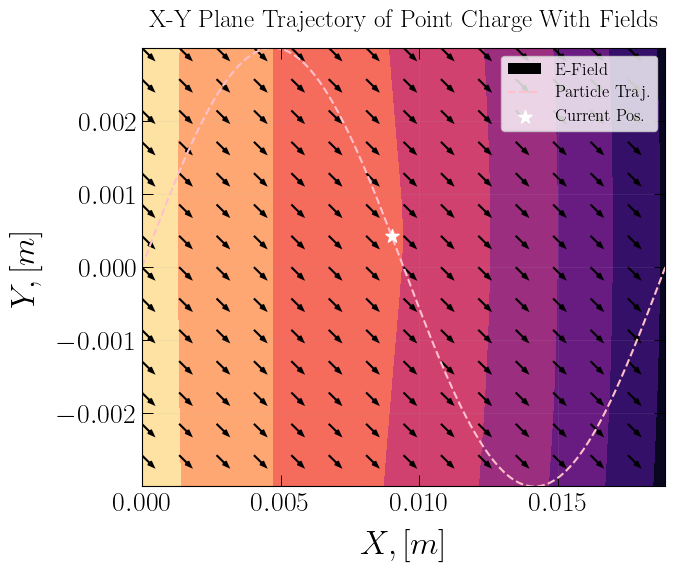

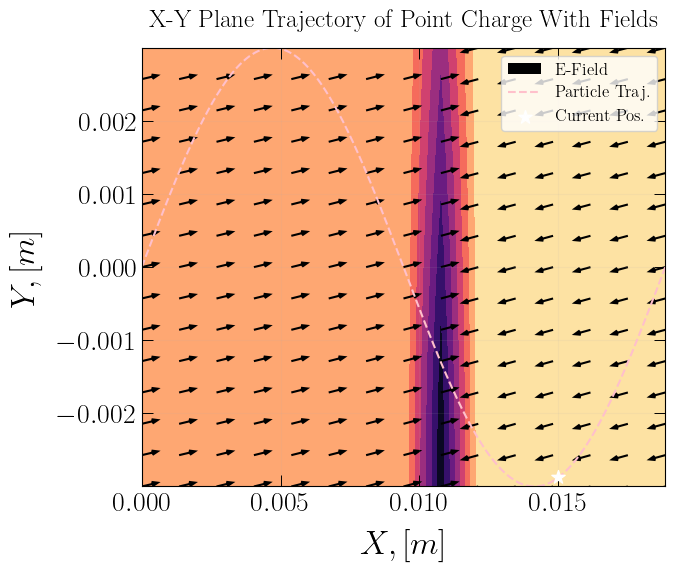

In [397]:
# we can now run our function for a number of different times
# and a number of different values of rho:

# We will end up with 12 plots as with the current settings of everything
# we will start with one rho and make four plots for four times in the 
# particles evolution:

# first with rh0=0.01:

times = [0.51e-9, 1.5e-9, 3e-9, 5e-9]


field_plotter(times[0], rhos[0])
field_plotter(times[1], rhos[0])
field_plotter(times[2], rhos[0])
field_plotter(times[3], rhos[0])

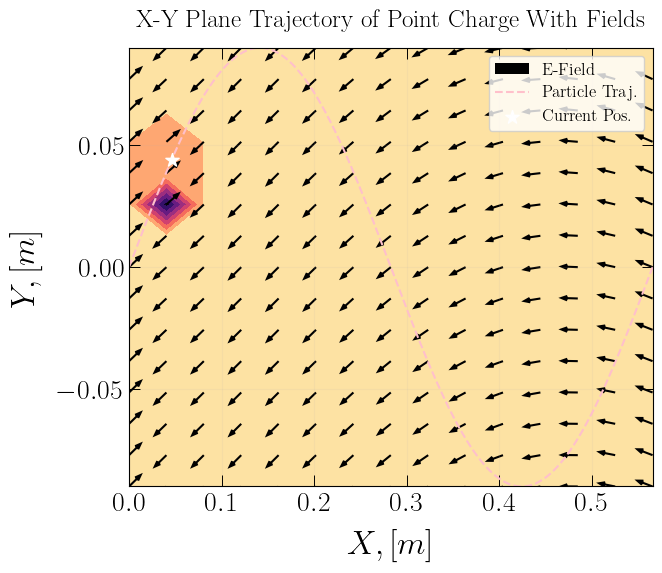

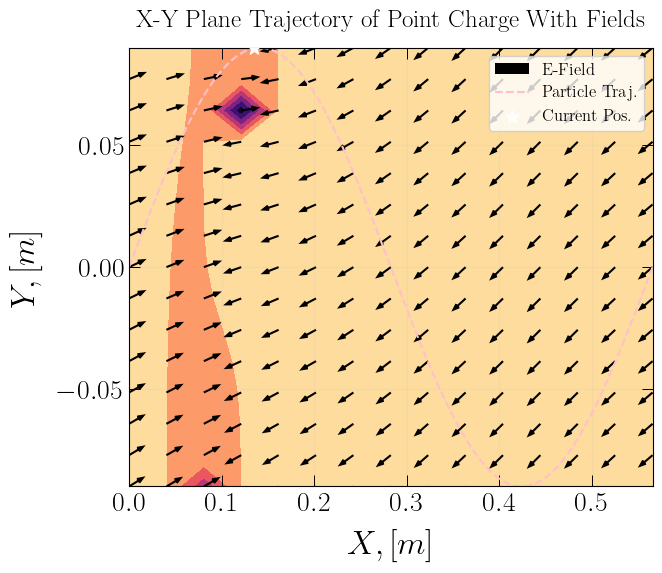

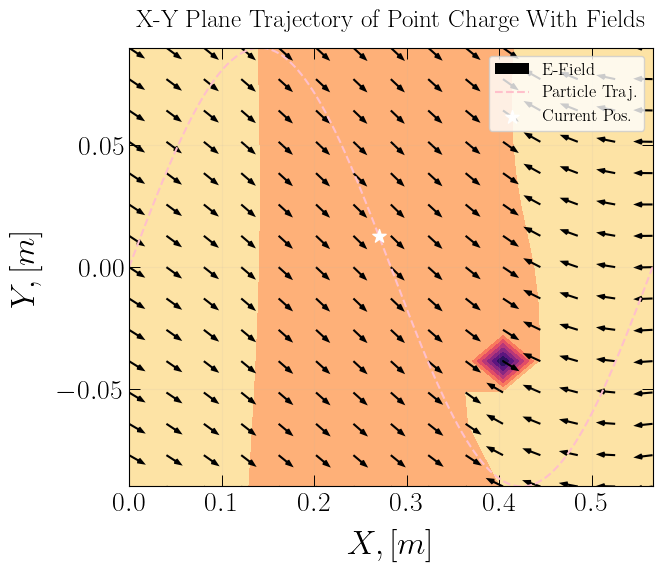

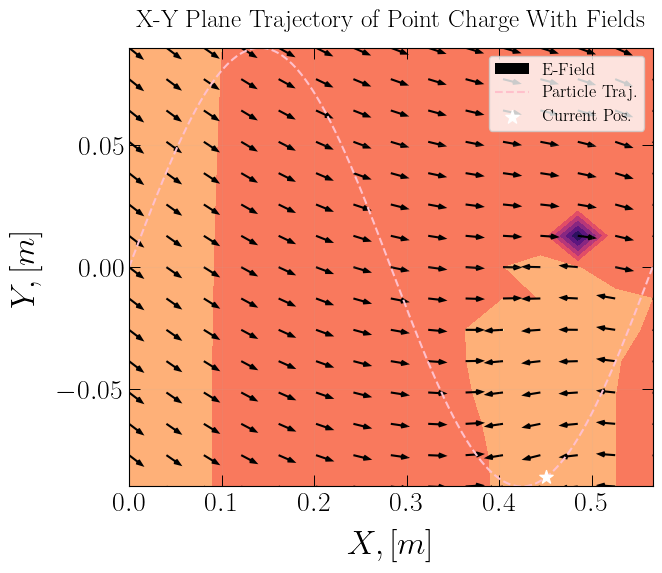

In [403]:
# Next with rh0=0.01:

times = [0.51e-9, 1.5e-9, 3e-9, 5e-9]


field_plotter(times[0], rhos[1])
field_plotter(times[1], rhos[1])
field_plotter(times[2], rhos[1])
field_plotter(times[3], rhos[1])

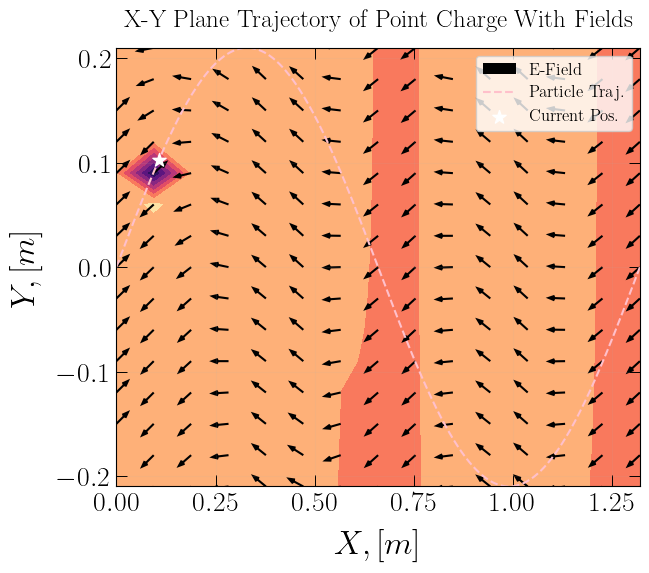

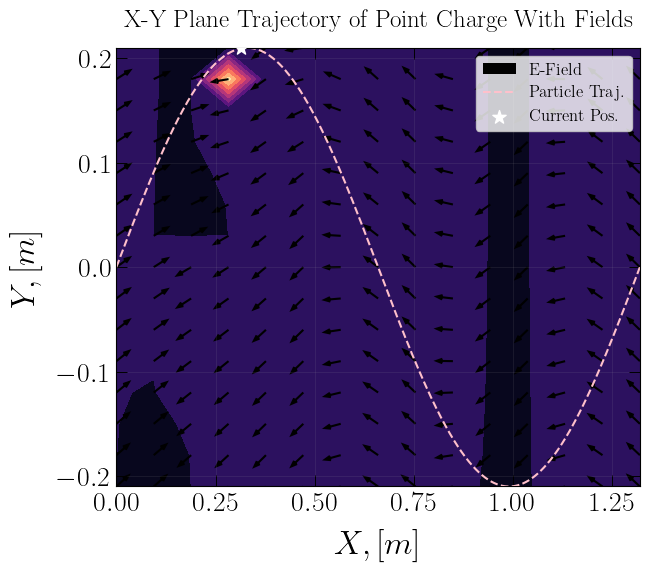

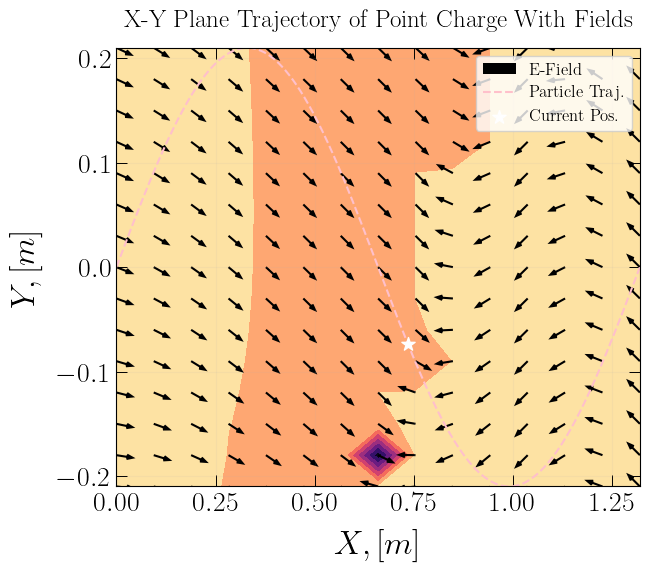

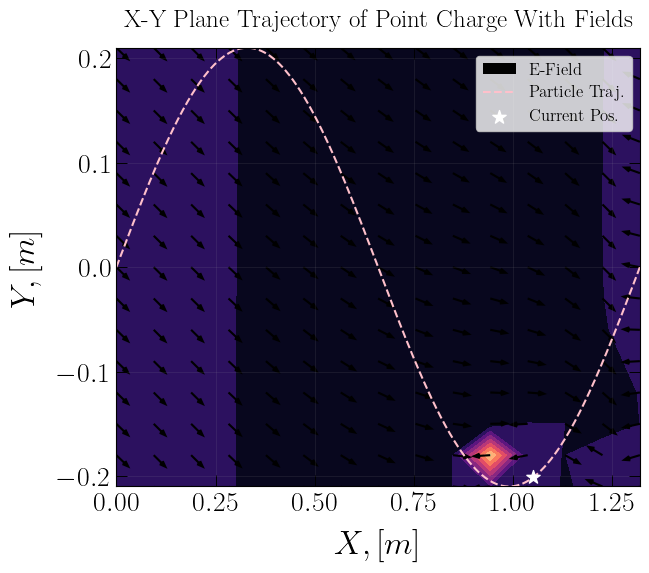

In [401]:
# Finally with rh0=0.7:

times = [0.51e-9, 1.5e-9, 3.5e-9, 5e-9]


field_plotter(times[0], rhos[2])
field_plotter(times[1], rhos[2])
field_plotter(times[2], rhos[2])
field_plotter(times[3], rhos[2])

In [441]:
# now we wish to repeat the above process but with the pynting vector,
# will steal the function from previously and use it to find S:

def poynting_plotter(T, p, gridsize=15, arrowc='k'):
    '''
    Takes a given time, T in the 
    evolution of the particle, a particular 
    value of rho and a gridsize and 
    plots the poynting field with the
    particle trajectory overlaid
    '''
    
    # first need to generate a grid that captures all
    # of the important parts of the plot:
    boundsx = np.array([min(position(t_vals, p*c/w)[0]),max(position(t_vals, p*c/w)[0])])
    boundsy = np.array([min(position(t_vals, p*c/w)[1]),max(position(t_vals, p*c/w)[1])])
    
    # now need to generate the matrix of XY values that will correspond
    # to the grid that we evaluate the retarded time and field at:
    X_vals = np.linspace(boundsx[0], boundsx[1], gridsize)
    Y_vals = np.linspace(boundsy[0], boundsy[1], gridsize)
    
    # grid:
    XX, YY = np.meshgrid(X_vals,Y_vals)
    
    # initializes field arrays:
    
    s_field_x = np.zeros((gridsize,gridsize)); 
    s_field_y = np.zeros((gridsize,gridsize)); 


    # there is absolutely a way to do this vectorized with some kind of matlaby thing
    # but before I remember how to do that, I shall just loop through the grid:
    
    for i in range(gridsize):
        for j in range(gridsize):
            
            # first step inside of grid space is to find the retarded time for 
            # the given point: will do this with an optimization library
            t_r = sp.optimize.root(ret_time, 0, args=(T, XX[j][i], YY[j][i],p)).x[0]
            
            # now we need the position vector of the given grid cell:
            
            pos = np.array(XX[j][i], YY[j][i])
            
            # can calculate the fields now:
            Ex, Ey = electro_field(t_r, pos, p)
            
            Bz = magnetic_field(t_r, pos, p)[2]
            Bx = magnetic_field(t_r, pos, p)[0]
            By = magnetic_field(t_r, pos, p)[1]

            
            e_vec = np.array([Ex, Ey, 0])
            b_vec = np.array([Bx,By,Bz])
            
            S_vec = (1/mu0) * np.cross(e_vec, b_vec)
            
            Sx = S_vec[0]; Sy = S_vec[1]; Sz = S_vec[2]
            
            Sxn = Sx/np.sqrt(Sx**2 +Sy**2)
            Syn = Sy/np.sqrt(Sx**2 +Sy**2)
            Szn = Sz/np.sqrt(Sx**2 +Sy**2)


            
            s_field_x[j][i] = Sxn
            s_field_y[j][i] = Syn


    # trajectory of the particle given parameters:
    
    trajectory = position(t_vals, p*c/w)
                             
    # initiates plotting parameters
    width=8;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

    # labels
    ax1.set_title(r"X-Y Plane Trajectory of Point Charge With Poynting Vector", pad = 15, fontsize=18)
    ax1.set_xlabel(r"$X, [m]$",labelpad =10, fontsize=24)
    ax1.set_ylabel(r"$Y, [m]$",labelpad =10,fontsize=24)

    # actual plots:
    quiver = ax1.quiver(XX, YY, s_field_x, s_field_y,color=arrowc ,headlength=4, label='E-Field')

    # plots trajectory:
    ax1.plot(trajectory[0], trajectory[1],c='crimson', linestyle='--', label='Particle Traj.')
    
    # plots current position:
    ax1.scatter(position(T, p*c/w)[0],position(T, p*c/w)[1], color='darkcyan', marker='*',s=100,zorder=100, label='Current Pos.')

    
    # ticks and legend:
    #ax1.yaxis.set_major_locator(MultipleLocator(20));ax1.yaxis.set_minor_locator(MultipleLocator(4))
    #ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(200))
    ax1.tick_params(axis='both', direction="in")
    ax1.tick_params(which="minor", axis="x", direction="in")
    ax1.tick_params(which="minor", axis="y", direction="in")
    ax1.xaxis.set_ticks_position('both') 
    ax1.yaxis.set_ticks_position('both')
    ax1.grid(True, alpha=0.1, zorder=10)

    ax1.legend(fontsize=12)
    plt.show()
        

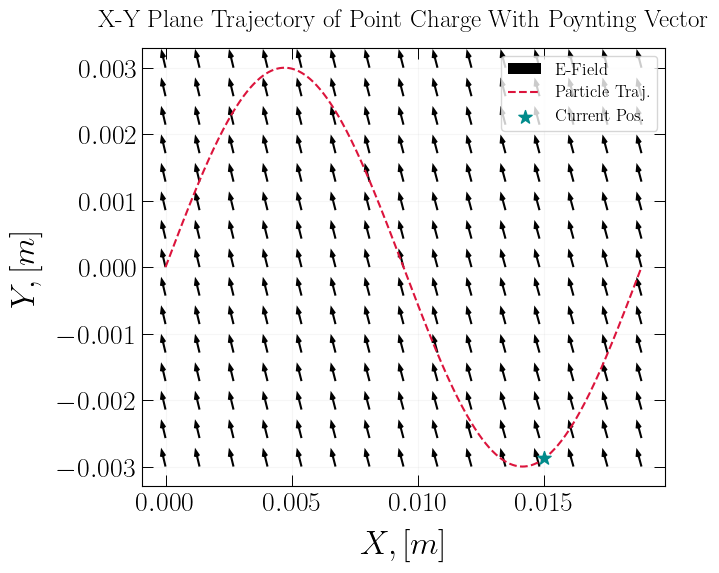

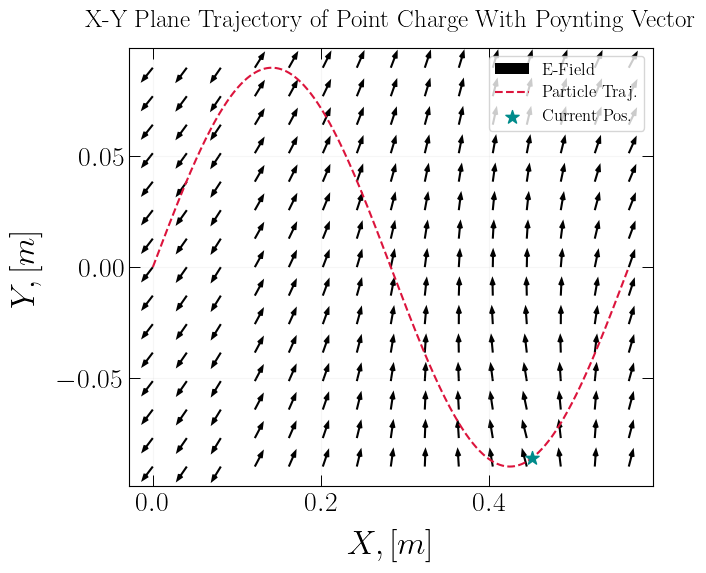

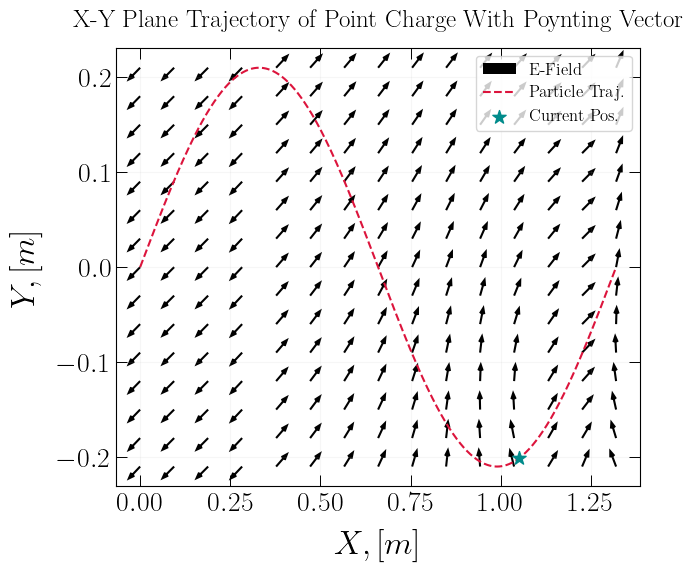

In [442]:
# we now wish to run this for all of our rhos, for a particular timestep.
# will do this for the timestep that appears most well-behaved of all of them
# choose times[0]:

poynting_plotter(times[3], rhos[0])
poynting_plotter(times[3], rhos[1])
poynting_plotter(times[3], rhos[2])